In [1]:
# importing required libraries
from time import time
from tensorflow.keras.optimizers import Adam

from init import init_style_target
from init import init_content_target
from init import init_generated_img

from Model import create_list_of_vgg_layer
from Model import load_vgg19
from Model import create_multi_output_model

from image import load_image
from image import tensor_to_image

from verbose import display_pictures
from verbose import display_generated_img
from verbose import display_convertion_style

from loss import compute_total_loss
from compute import compute_and_optimize_gradient

from style import update_style

In [2]:
class Model_Style_Transfert:

    def __init__(self, optimizer=Adam(learning_rate=0.02), style_weight=1e6, content_weight=5e0, noise_ratio=0.20):
        super().__init__()
    
        self.style_weight = style_weight
        self.content_weight = content_weight
        self.noise_ratio = noise_ratio
        self.optimizer = optimizer
        
        self.content_layers, self.style_layers, = create_list_of_vgg_layer()
        self.num_style_layers  = len(self.style_layers)
        
        self.model = create_multi_output_model(self.style_layers, self.content_layers)
        
        self.style_img = None
        self.content_img = None
        self.generated_img = None

    def import_img(self, content_img, style_img):

        self.content_img = load_image(content_img)
        self.style_img = load_image(style_img)

        display_pictures(self.content_img, self.style_img)
        return (self.content_img, self.style_img)

    
    def transfert_style(self, num_epochs,):

        target_style = init_style_target(self.model, self.style_img)
        target_content = init_content_target(self.model, self.content_img)
        self.generated_img = init_generated_img(self.content_img, self.noise_ratio)
            
        start = time()
        for epoch in range(num_epochs) :

            update_style(self.model,
                         target_style, 
                         target_content, 
                         self.generated_img, 
                         self.style_weight, 
                         self.content_weight,
                         self.optimizer)
    
            display_generated_img(self.generated_img, epoch, num_epochs)
             
        end = time()
        print("Total training time: {:.1f} seconds".format(end-start))
        
        return (self.generated_img)



In [3]:
Model = Model_Style_Transfert()

2022-11-10 23:13:10.621107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 23:13:10.648450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 23:13:10.648646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 23:13:10.648973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

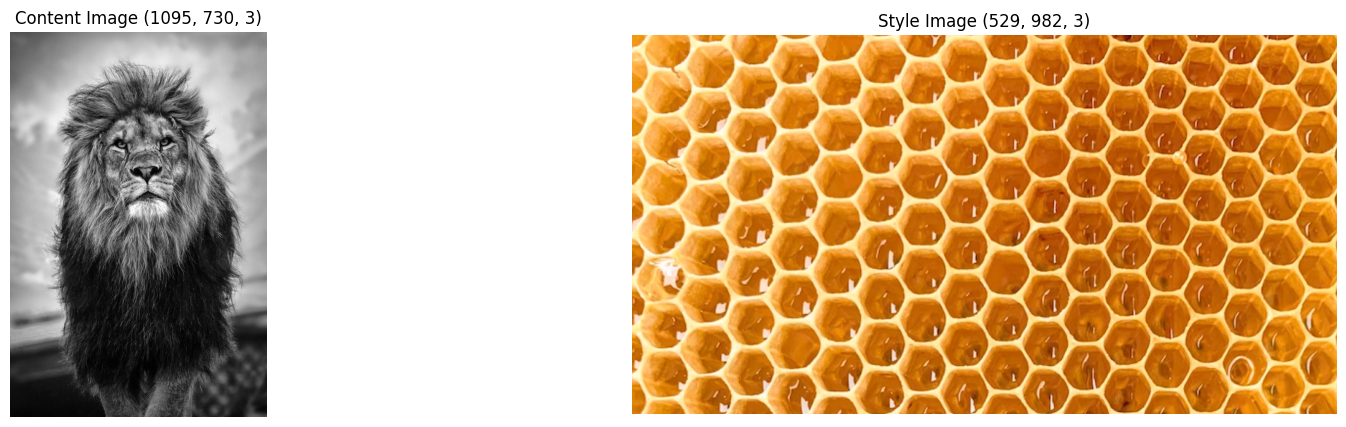

In [4]:
content_path  = 'img/content/content_img.jpg'
style_path = 'img/style/honey.png'
content_img, style_img = Model.import_img(content_path, style_path)

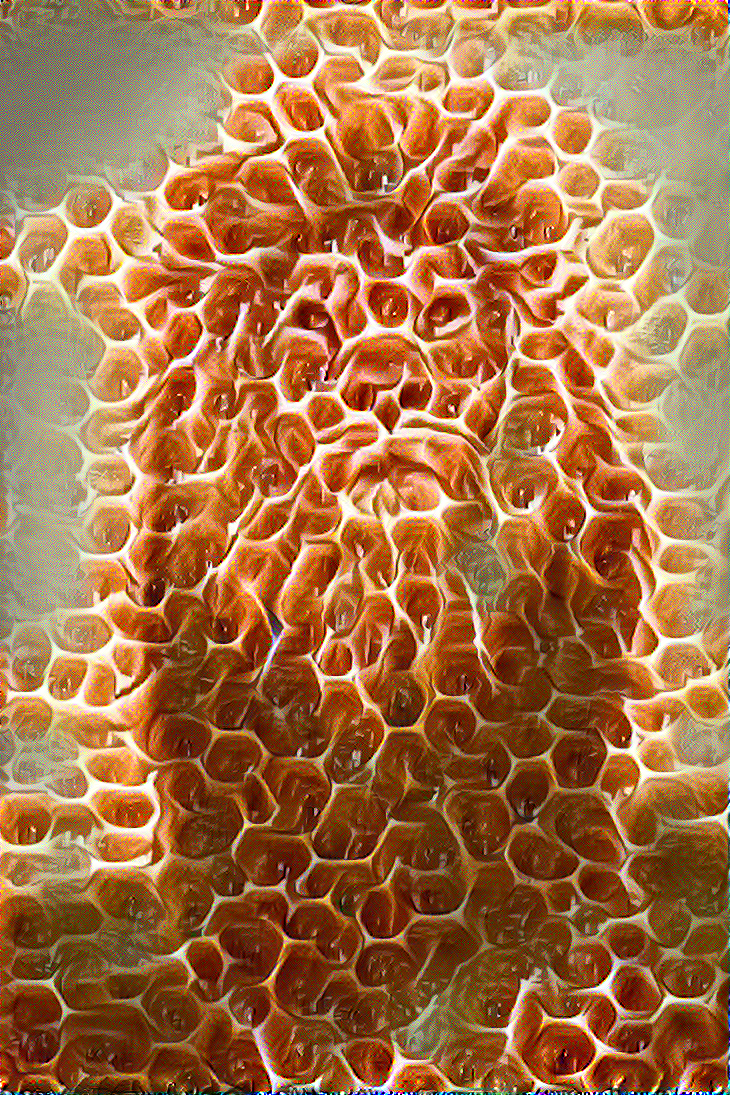

epoch : 1600
Progression : 53.333333333333336%
epoch : 1601
Progression : 53.36666666666667%
epoch : 1602
Progression : 53.4%
epoch : 1603
Progression : 53.43333333333333%
epoch : 1604
Progression : 53.46666666666667%
epoch : 1605
Progression : 53.5%
epoch : 1606
Progression : 53.53333333333333%
epoch : 1607
Progression : 53.56666666666667%
epoch : 1608
Progression : 53.6%
epoch : 1609
Progression : 53.63333333333333%
epoch : 1610
Progression : 53.666666666666664%
epoch : 1611
Progression : 53.7%
epoch : 1612
Progression : 53.733333333333334%
epoch : 1613
Progression : 53.766666666666666%
epoch : 1614
Progression : 53.8%
epoch : 1615
Progression : 53.833333333333336%
epoch : 1616
Progression : 53.86666666666667%
epoch : 1617
Progression : 53.9%
epoch : 1618
Progression : 53.93333333333333%
epoch : 1619
Progression : 53.96666666666667%
epoch : 1620
Progression : 54.0%
epoch : 1621
Progression : 54.03333333333333%
epoch : 1622
Progression : 54.06666666666667%


KeyboardInterrupt: 

In [5]:
final_img = Model.transfert_style(num_epochs=3000)

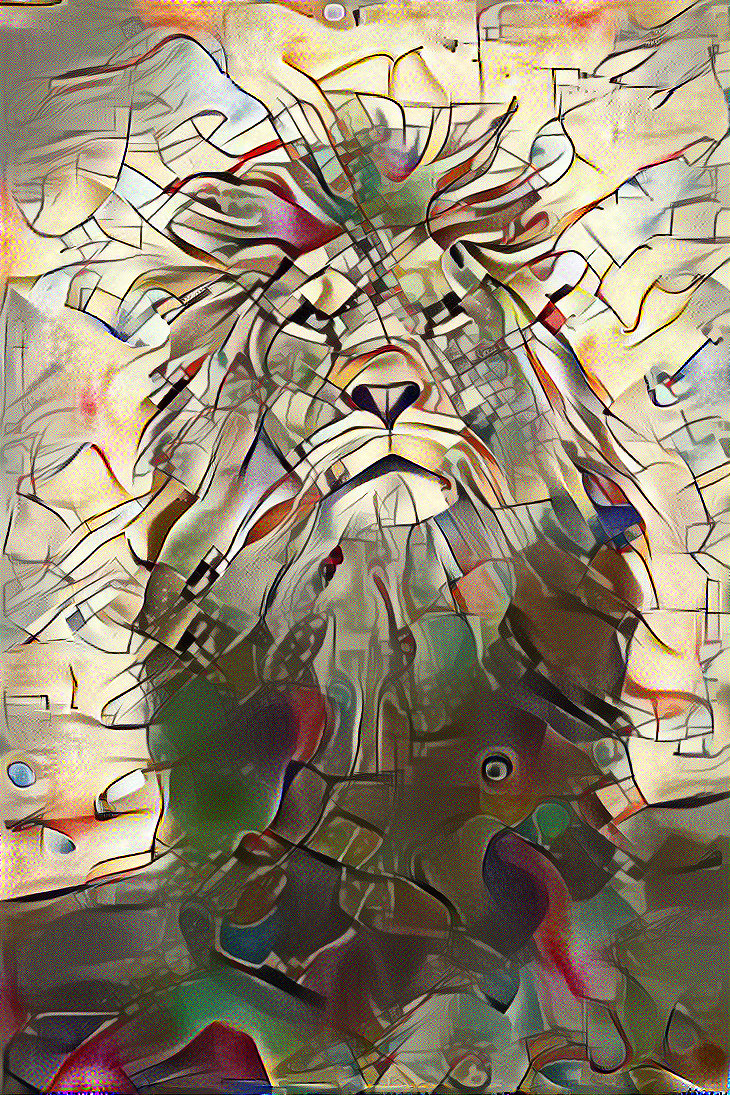

epoch : 0


ZeroDivisionError: division by zero

In [ ]:
display_generated_img(Model.generated_img, 0, 0)

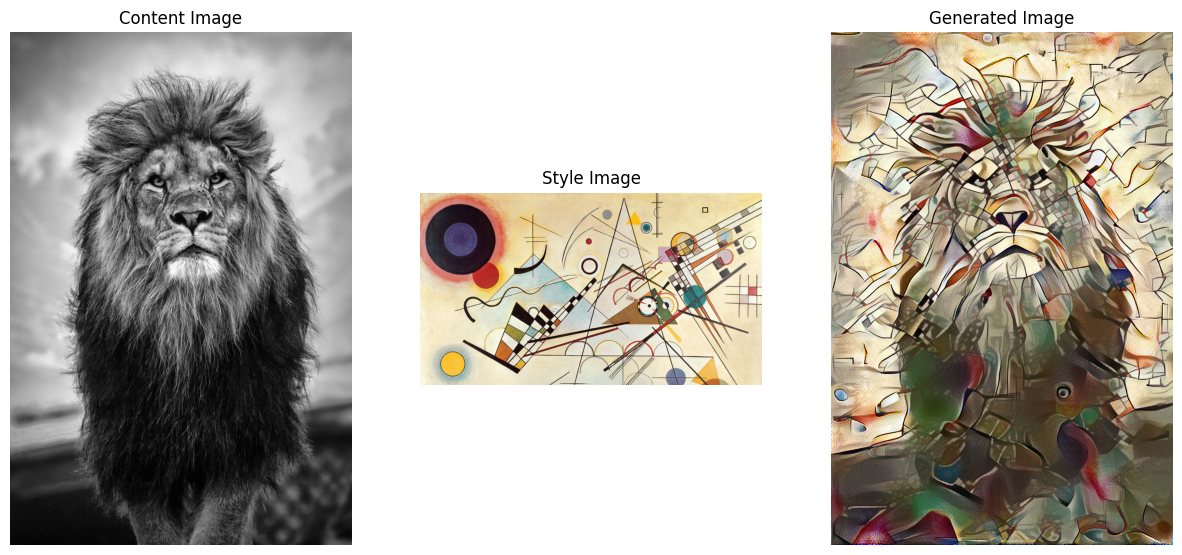

In [ ]:
display_convertion_style(content_img, style_img, Model.generated_img)